In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# importar datosd

In [2]:
old = pd.read_csv('sargento-old-080918.csv', header=None, skiprows=2 )
old.head()

,0,1,2,3,4
0,1,08/16/2018 12:30:00,104.359,29.252,-0.340
1,2,08/16/2018 12:45:00,104.243,28.754,-0.351
2,3,08/16/2018 13:00:00,104.255,28.655,-0.350
3,4,08/16/2018 13:15:00,104.239,28.655,-0.352
4,5,08/16/2018 13:30:00,104.255,28.655,-0.350


In [3]:
pd.read_csv?

In [4]:
canal = pd.read_csv('sargento-canal.csv', header=None, skiprows=1)
canal.head()

,0,1,2,3,4
0,1,08/16/2018 11:15:01,112.032,29.152,0.360
1,2,08/16/2018 11:30:02,111.990,27.567,0.356
2,3,08/16/2018 11:45:03,111.928,27.272,0.350
3,4,08/16/2018 12:00:04,111.899,27.173,0.347
4,5,08/16/2018 12:15:05,111.870,27.075,0.344


In [5]:
salinidad=pd.read_csv('salinidad_080918.csv', header=None, skiprows=2)
salinidad.head()

,0,1,2,3,4,5,6
0,1,08/16/2018 12:45:00,33686,54525.5,28.54,50942.8,33.4310
1,2,08/16/2018 13:00:00,33686,54525.5,28.43,51048.0,33.5085
2,3,08/16/2018 13:15:00,33686,54525.5,28.35,51124.8,33.5651
3,4,08/16/2018 13:30:00,33686,54525.5,28.31,51163.3,33.5935
4,5,08/16/2018 13:45:00,33686,54525.5,28.28,51192.2,33.6148


# Trabajo de datos

In [6]:
canal.columns = ['#','Fecha','Presion','Temp','Nivel']
canal.head()

,#,Fecha,Presion,Temp,Nivel
0,1,08/16/2018 11:15:01,112.032,29.152,0.360
1,2,08/16/2018 11:30:02,111.990,27.567,0.356
2,3,08/16/2018 11:45:03,111.928,27.272,0.350
3,4,08/16/2018 12:00:04,111.899,27.173,0.347
4,5,08/16/2018 12:15:05,111.870,27.075,0.344


In [7]:
old.columns = ['#','Fecha','Presion','Temp','Nivel']
old.head()

,#,Fecha,Presion,Temp,Nivel
0,1,08/16/2018 12:30:00,104.359,29.252,-0.340
1,2,08/16/2018 12:45:00,104.243,28.754,-0.351
2,3,08/16/2018 13:00:00,104.255,28.655,-0.350
3,4,08/16/2018 13:15:00,104.239,28.655,-0.352
4,5,08/16/2018 13:30:00,104.255,28.655,-0.350


In [26]:
salinidad.columns = ['#','Fecha','Conductividad baja','Conductividad baja',
                     'Temp','conductancia especifica, s/cm,',
                     'sal, ppt',]
salinidad.head()

,#,Fecha,Conductividad baja,Conductividad baja,Temp,"conductancia especifica, s/cm,","sal, ppt"
0,1,2018-08-16 12:45:00,33686,54525.5,28.54,50942.8,33.4310
1,2,2018-08-16 13:00:00,33686,54525.5,28.43,51048.0,33.5085
2,3,2018-08-16 13:15:00,33686,54525.5,28.35,51124.8,33.5651
3,4,2018-08-16 13:30:00,33686,54525.5,28.31,51163.3,33.5935
4,5,2018-08-16 13:45:00,33686,54525.5,28.28,51192.2,33.6148


# cambiar formato de fecha a tiempo

In [10]:
canal['Fecha'] = pd.to_datetime(canal['Fecha'])
canal.dtypes

#                   int64
Fecha      datetime64[ns]
Presion           float64
Temp              float64
Nivel             float64
dtype: object

In [11]:
old['Fecha'] = pd.to_datetime(old['Fecha'])
old.dtypes

#                   int64
Fecha      datetime64[ns]
Presion           float64
Temp              float64
Nivel             float64
dtype: object

In [12]:
salinidad['Fecha'] = pd.to_datetime(salinidad['Fecha'])
salinidad.dtypes

#                                          int64
Fecha                             datetime64[ns]
Low Ring                                   int64
High Ring                                float64
Temp                                     float64
conductancia especifica, s/cm,           float64
sal, ppt                                 float64
dtype: object

# Datos de la estacion, del canal y de la salinidad

In [13]:
#un dia
diacanal = canal[(canal['Fecha'] > '09/07/2018 00:04') &  (canal['Fecha'] < '09/07/2018 23:51')]

diaold = old[(old['Fecha'] < '09/07/2018 23:45')& (old['Fecha'] > '09/07/2018 00:00')] 

diasal = salinidad[(salinidad['Fecha'] <'09/07/2018 23:45')&( salinidad['Fecha']>'09/07/2018 00:00')]

In [14]:
diacanal.head()

,#,Fecha,Presion,Temp,Nivel
2066,2067,2018-09-07 00:19:00,119.499,27.173,1.103
2067,2068,2018-09-07 00:34:00,119.369,27.173,1.090
2068,2069,2018-09-07 00:49:00,119.083,27.173,1.062
2069,2070,2018-09-07 01:04:00,118.667,27.173,1.020
2070,2071,2018-09-07 01:19:00,118.160,27.173,0.970


In [15]:
diaold['Fecha'].head()

2063   2018-09-07 00:15:00
2064   2018-09-07 00:30:00
2065   2018-09-07 00:45:00
2066   2018-09-07 01:00:00
2067   2018-09-07 01:15:00
Name: Fecha, dtype: datetime64[ns]

In [16]:
diacanal['Fecha'].head()

2066   2018-09-07 00:19:00
2067   2018-09-07 00:34:00
2068   2018-09-07 00:49:00
2069   2018-09-07 01:04:00
2070   2018-09-07 01:19:00
Name: Fecha, dtype: datetime64[ns]

In [17]:
diasal.head()

,#,Fecha,Low Ring,High Ring,Temp,"conductancia especifica, s/cm,","sal, ppt"
2062,2063,2018-09-07 00:15:00,33686,54525.5,28.27,51201.8,33.6219
2063,2064,2018-09-07 00:30:00,33686,54525.5,28.27,51201.8,33.6219
2064,2065,2018-09-07 00:45:00,33686,54525.5,28.27,51201.8,33.6219
2065,2066,2018-09-07 01:00:00,33686,54525.5,28.27,51201.8,33.6219
2066,2067,2018-09-07 01:15:00,33686,54525.5,28.28,51192.2,33.6148


# gráfica de niveles de mar del sensor junto a la estación y el del canal

In [41]:
#un dia
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=diaold['Fecha'],
    y=diaold['Nivel'],
    name='estacion',
)
trace2 = go.Scatter(
    x=diaold['Fecha'],
    y=diacanal['Nivel'],
    name='canal',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title=' niveles de mar del sensor junto a la estación y el del canal de un dia',
    yaxis=dict(
        title='nivel del mar en la estacion'
    ),
    yaxis2=dict(
        title='nivel del mar en el canal',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

# Gráfica de salinidad y nivel de mar del sensor junto a la estación. 

In [27]:
diasal.head()

,#,Fecha,Low Ring,High Ring,Temp,"conductancia especifica, s/cm,","sal, ppt"
2062,2063,2018-09-07 00:15:00,33686,54525.5,28.27,51201.8,33.6219
2063,2064,2018-09-07 00:30:00,33686,54525.5,28.27,51201.8,33.6219
2064,2065,2018-09-07 00:45:00,33686,54525.5,28.27,51201.8,33.6219
2065,2066,2018-09-07 01:00:00,33686,54525.5,28.27,51201.8,33.6219
2066,2067,2018-09-07 01:15:00,33686,54525.5,28.28,51192.2,33.6148


In [19]:
#un dia
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=diaold['Fecha'],
    y=diaold['Nivel'],
    name='nivel',
)
trace2 = go.Scatter(
    x=diaold['Fecha'],
    y=diasal['sal, ppt'],
    name='salinidad',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title=' salinidad y nivel de mar del sensor en la estación de un dia',
    yaxis=dict(
        title='nivel'
    ),
    yaxis2=dict(
        title='salinidad',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

# Gráfica de temperatura de agua entre el sensor junto a la estación y el del canal. 

In [20]:
#un dia
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=diaold['Fecha'],
    y=diaold['Temp'],
    name='estacion',
)
trace2 = go.Scatter(
    x=diaold['Fecha'],
    y=diacanal['Temp'],
    name='canal',
    yaxis='y2'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Gráfica de temperatura de agua entre el sensor junto a la estación y el del canal de un ida',
    yaxis=dict(
        title='Temperatura en el sensor de la estacion'
    ),
    yaxis2=dict(
        title='Temperatura en el sensor del canal',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='multiple-axes-double')

# correlación entre el nivel de agua y la salinidad: correlation matrix python heat map

In [19]:
print(diasal['sal, ppt'])

2062    33.6219
2063    33.6219
2064    33.6219
2065    33.6219
2066    33.6148
2067    33.6219
2068    33.6219
2069    33.6574
2070    33.6646
2071    33.6646
2072    33.6788
2073    33.6788
2074    33.6788
2075    33.6788
2076    33.6646
2077    33.6788
2078    33.6788
2079    33.6646
2080    33.6646
2081    33.6646
2082    33.6646
2083    33.6646
2084    33.6574
2085    33.6574
2086    33.6574
2087    33.6574
2088    33.6574
2089    33.6574
2090    33.6432
2091    33.6432
         ...   
2126    33.6219
2127    33.6361
2128    33.6574
2129    33.6646
2130    33.6788
2131    33.6859
2132    33.6859
2133    33.6859
2134    33.7002
2135    33.6859
2136    33.7002
2137    33.7002
2138    33.7002
2139    33.7002
2140    33.7002
2141    33.7002
2142    33.7002
2143    33.6859
2144    33.6859
2145    33.6859
2146    33.6859
2147    33.6859
2148    33.6859
2149    33.6859
2150    33.6859
2151    33.6859
2152    33.6859
2153    33.6646
2154    33.6574
2155    33.6432
Name: sal, ppt, Length: 

In [20]:
print(diaold['Nivel'])

2063    0.083
2064    0.066
2065    0.027
2066   -0.017
2067   -0.073
2068   -0.151
2069   -0.240
2070   -0.307
2071   -0.312
2072   -0.316
2073   -0.316
2074   -0.318
2075   -0.320
2076   -0.321
2077   -0.324
2078   -0.324
2079   -0.326
2080   -0.324
2081   -0.328
2082   -0.329
2083   -0.326
2084   -0.329
2085   -0.328
2086   -0.328
2087   -0.328
2088   -0.328
2089   -0.328
2090   -0.326
2091   -0.327
2092   -0.327
        ...  
2127   -0.102
2128   -0.207
2129   -0.290
2130   -0.328
2131   -0.329
2132   -0.332
2133   -0.332
2134   -0.334
2135   -0.334
2136   -0.331
2137   -0.332
2138   -0.329
2139   -0.328
2140   -0.328
2141   -0.321
2142   -0.323
2143   -0.321
2144   -0.320
2145   -0.321
2146   -0.320
2147   -0.321
2148   -0.320
2149   -0.320
2150   -0.316
2151   -0.316
2152   -0.315
2153   -0.189
2154   -0.088
2155   -0.018
2156    0.063
Name: Nivel, Length: 94, dtype: float64


In [21]:
print(diacanal['Nivel'])

2066    1.103
2067    1.090
2068    1.062
2069    1.020
2070    0.970
2071    0.907
2072    0.832
2073    0.744
2074    0.654
2075    0.571
2076    0.508
2077    0.459
2078    0.421
2079    0.390
2080    0.370
2081    0.354
2082    0.342
2083    0.334
2084    0.327
2085    0.320
2086    0.317
2087    0.315
2088    0.314
2089    0.312
2090    0.311
2091    0.311
2092    0.310
2093    0.311
2094    0.310
2095    0.310
        ...  
2130    0.931
2131    0.850
2132    0.769
2133    0.686
2134    0.612
2135    0.543
2136    0.487
2137    0.444
2138    0.410
2139    0.384
2140    0.366
2141    0.352
2142    0.342
2143    0.336
2144    0.330
2145    0.327
2146    0.323
2147    0.321
2148    0.320
2149    0.317
2150    0.314
2151    0.312
2152    0.310
2153    0.312
2154    0.375
2155    0.619
2156    0.805
2157    0.911
2158    0.986
2159    1.058
Name: Nivel, Length: 94, dtype: float64


In [33]:
 dia= {'salinidad':diasal['sal, ppt'] ,
      'conductacia especifica':diasal['conductancia especifica, s/cm,'],
      'Temp': diasal['Temp'],
      'Nivel en la estacion':diaold['Nivel'],
       'Temp de la estacion': diaold['Temp'],
      'presion en la estacion':diaold['Presion'],
      'Nivel en el canal':diacanal['Nivel'],
       'Temp en el canal': diacanal['Temp'],
      'presion en el canal':diacanal['Presion']}
Dia = pd.DataFrame(data=dia)
Dia

,salinidad,conductacia especifica,Temp,Nivel en la estacion,Temp de la estacion,presion en la estacion,Nivel en el canal,Temp en el canal,presion en el canal
2062,33.6219,51201.8,28.27,NaN,NaN,NaN,NaN,NaN,NaN
2063,33.6219,51201.8,28.27,0.083,28.258,108.610,NaN,NaN,NaN
2064,33.6219,51201.8,28.27,0.066,28.258,108.434,NaN,NaN,NaN
2065,33.6219,51201.8,28.27,0.027,28.258,108.049,NaN,NaN,NaN
2066,33.6148,51192.2,28.28,-0.017,28.258,107.600,1.103,27.173,119.499
2067,33.6219,51201.8,28.27,-0.073,28.258,107.040,1.090,27.173,119.369
2068,33.6219,51201.8,28.27,-0.151,28.258,106.255,1.062,27.173,119.083
2069,33.6574,51250.0,28.22,-0.240,28.258,105.359,1.020,27.173,118.667
2070,33.6646,51259.7,28.21,-0.307,28.258,104.688,0.970,27.173,118.160
2071,33.6646,51259.7,28.21,-0.312,28.258,104.640,0.907,27.173,117.524


In [34]:
Dia.corr()

,salinidad,conductacia especifica,Temp,Nivel en la estacion,Temp de la estacion,presion en la estacion,Nivel en el canal,Temp en el canal,presion en el canal
salinidad,1.000000e+00,9.999998e-01,-9.999994e-01,-7.384638e-01,3.780866e-01,-7.385280e-01,-6.294800e-01,-1.048046e-12,-6.293958e-01
conductacia especifica,9.999998e-01,1.000000e+00,-9.999997e-01,-7.386937e-01,3.779267e-01,-7.387580e-01,-6.296975e-01,-1.523137e-13,-6.296134e-01
Temp,-9.999994e-01,-9.999997e-01,1.000000e+00,7.388517e-01,-3.778820e-01,7.389160e-01,6.298912e-01,6.616442e-13,6.298071e-01
Nivel en la estacion,-7.384638e-01,-7.386937e-01,7.388517e-01,1.000000e+00,-2.763648e-02,9.999996e-01,8.481529e-01,1.542314e-16,8.481531e-01
Temp de la estacion,3.780866e-01,3.779267e-01,-3.778820e-01,-2.763648e-02,1.000000e+00,-2.773116e-02,2.237263e-01,3.756704e-13,2.238163e-01
presion en la estacion,-7.385280e-01,-7.387580e-01,7.389160e-01,9.999996e-01,-2.773116e-02,1.000000e+00,8.481471e-01,1.372186e-14,8.481474e-01
Nivel en el canal,-6.294800e-01,-6.296975e-01,6.298912e-01,8.481529e-01,2.237263e-01,8.481471e-01,1.000000e+00,-6.078504e-17,9.999998e-01
Temp en el canal,-1.048046e-12,-1.523137e-13,6.616442e-13,1.542314e-16,3.756704e-13,1.372186e-14,-6.078504e-17,1.000000e+00,1.249665e-14
presion en el canal,-6.293958e-01,-6.296134e-01,6.298071e-01,8.481531e-01,2.238163e-01,8.481474e-01,9.999998e-01,1.249665e-14,1.000000e+00


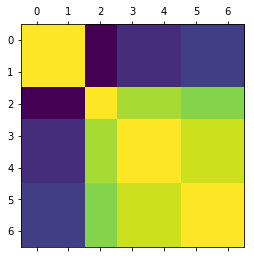

In [32]:
import matplotlib.pyplot as plt

plt.matshow(Dia.corr())

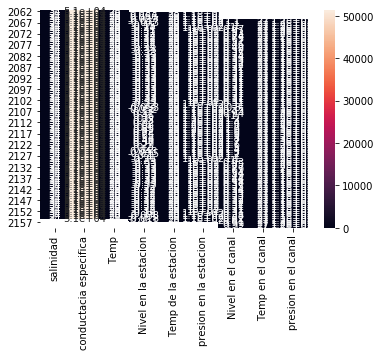

In [36]:
import seaborn as sns
sns.heatmap(Dia, annot=True)

In [44]:
 d = {'salinidad': diasal['sal, ppt'], 'nivel del agua': diasal['Nivel']}
df = pd.DataFrame(data=d)
df


,salinidad,nivel del agua
2062,33.6219,28.27
2063,33.6219,28.27
2064,33.6219,28.27
2065,33.6219,28.27
2066,33.6148,28.28
2067,33.6219,28.27
2068,33.6219,28.27
2069,33.6574,28.22
2070,33.6646,28.21
2071,33.6646,28.21


In [45]:
df.corr()

,salinidad,nivel del agua
salinidad,1.000000,-0.999999
nivel del agua,-0.999999,1.000000


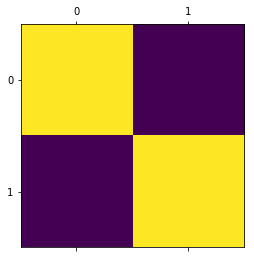

In [47]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())

In [25]:
import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
infert = com.importr("ISLR")

# load the Auto dataset
auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = auto_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ModuleNotFoundError: No module named 'pandas.rpy'

In [24]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

NameError: name 'sns' is not defined